In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data1.csv')

In [3]:
df.head()

,id,y,t,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,walkontoe,44:19.9,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931,33.8534
1,1,walkontoe,44:19.9,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854,33.8564
2,1,walkontoe,44:19.9,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777,33.8652
3,1,walkontoe,44:19.9,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589,33.8564
4,1,walkontoe,44:19.9,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237,33.8534


In [4]:
df['y'].unique()

array(['walkontoe', 'walkonheel', 'upstairs', 'downstairs', 'situps',
       'normalwalk', 'jogging', 'situp', 'upstair', 'downstair'],
      dtype=object)

In [5]:
#Replace 'upstairs' with 'upstair', 'situps' with 'situp', 'downstairs' with 'downstair' 
df.replace(to_replace='upstairs',value='upstair', inplace=True)
df.replace(to_replace='downstairs',value='downstair', inplace=True)
df.replace(to_replace='situps',value='situp', inplace=True)

In [6]:
df['y'].unique()

array(['walkontoe', 'walkonheel', 'upstair', 'downstair', 'situp',
       'normalwalk', 'jogging'], dtype=object)

In [7]:
df.columns

Index(['id', 'y', 't', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72157 entries, 0 to 72156
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      72157 non-null  int64  
 1   y       72157 non-null  object 
 2   t       72157 non-null  object 
 3   x1      72154 non-null  float64
 4   x2      72154 non-null  float64
 5   x3      72154 non-null  float64
 6   x4      72154 non-null  float64
 7   x5      72154 non-null  float64
 8   x6      72154 non-null  float64
 9   x7      72154 non-null  float64
 10  x8      72154 non-null  float64
 11  x9      72154 non-null  float64
 12  x10     72154 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 7.2+ MB


In [9]:
df.shape

(72157, 13)

In [10]:
df.drop(['id','t'],axis=1,inplace=True)

In [11]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,walkontoe,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931,33.8534
1,walkontoe,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854,33.8564
2,walkontoe,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777,33.8652
3,walkontoe,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589,33.8564
4,walkontoe,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237,33.8534


In [12]:
df.isna().sum()

y      0
x1     3
x2     3
x3     3
x4     3
x5     3
x6     3
x7     3
x8     3
x9     3
x10    3
dtype: int64

In [13]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (64941, 11)
Unseen Data For Predictions: (7216, 11)


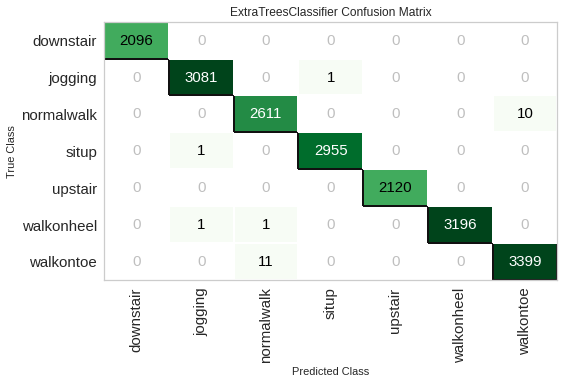

In [20]:
plot_model(et, plot = 'confusion_matrix')

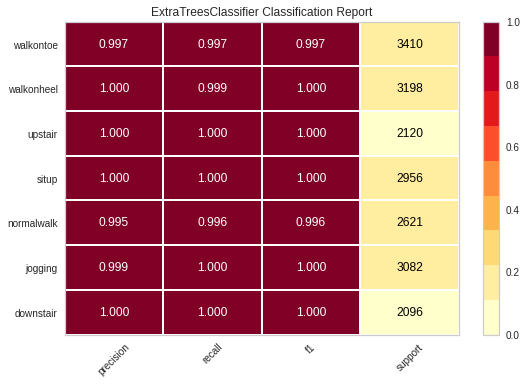

In [21]:
plot_model(et, plot = 'class_report')

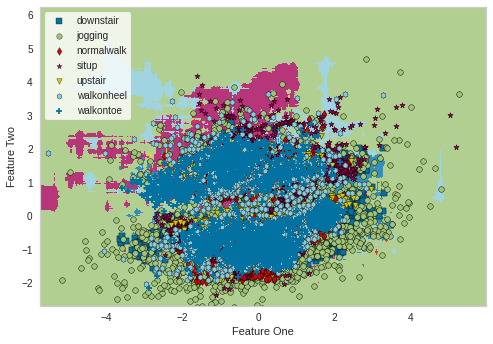

In [22]:
plot_model(et, plot='boundary')

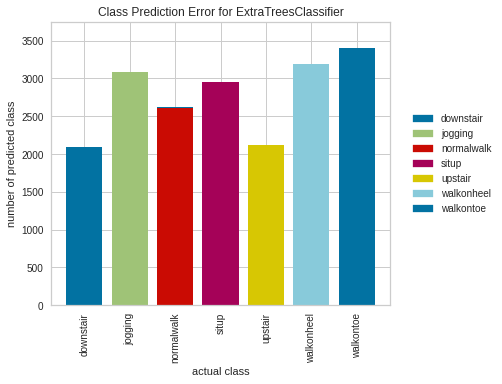

In [24]:
plot_model(et, plot = 'error')

In [60]:
#2

In [14]:
from pycaret.classification import *

exp_mclf102 = setup(data = data, target = 'y', session_id=123,remove_multicollinearity = True, multicollinearity_threshold = 0.6) 


,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Multiclass
3,Label Encoded,"downstair: 0, jogging: 1, normalwalk: 2, situp: 3, upstair: 4, walkonheel: 5, walkontoe: 6"
4,Original Data,"(64941, 11)"
5,Missing Values,1
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [85]:
best2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9988,1.0000,0.9988,0.9988,0.9988,0.9986,0.9986,1.1220
lightgbm,Light Gradient Boosting Machine,0.9969,1.0000,0.9971,0.9969,0.9969,0.9964,0.9964,1.6630
rf,Random Forest Classifier,0.9967,1.0000,0.9968,0.9967,0.9967,0.9961,0.9961,3.6150
gbc,Gradient Boosting Classifier,0.9859,0.9997,0.9862,0.9860,0.9859,0.9835,0.9835,26.1480
dt,Decision Tree Classifier,0.9830,0.9900,0.9835,0.9830,0.9830,0.9800,0.9800,0.2080
knn,K Neighbors Classifier,0.8044,0.9547,0.8105,0.8057,0.8042,0.7709,0.7712,0.2630
qda,Quadratic Discriminant Analysis,0.4753,0.8280,0.4694,0.5277,0.4757,0.3823,0.3937,0.0500
ada,Ada Boost Classifier,0.4563,0.8320,0.4415,0.4750,0.4538,0.3640,0.3674,0.9950
nb,Naive Bayes,0.3823,0.7654,0.3711,0.4319,0.3815,0.2717,0.2817,0.0340
lr,Logistic Regression,0.2869,0.6633,0.2755,0.2677,0.2624,0.1568,0.1599,8.4540


## Logistic Regression

In [86]:
lr = create_model('lr',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2794,0.6593,0.2688,0.2620,0.2550,0.1481,0.1511
1,0.2846,0.6606,0.2730,0.2597,0.2604,0.1539,0.1568
2,0.2965,0.6574,0.2832,0.2694,0.2699,0.1674,0.1706
3,0.2917,0.6703,0.2802,0.2679,0.2658,0.1628,0.1661
4,0.2827,0.6597,0.2706,0.2661,0.2583,0.1515,0.1545
5,0.2932,0.6699,0.2826,0.2797,0.2703,0.1647,0.1678
6,0.2970,0.6626,0.2853,0.2776,0.2689,0.1685,0.1719
7,0.2871,0.6681,0.2764,0.2736,0.2625,0.1571,0.1608
8,0.2865,0.6647,0.2735,0.2644,0.2641,0.1556,0.1586


In [87]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Naive Bayes

In [15]:
nb = create_model('nb',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3887,0.7691,0.3783,0.4386,0.3895,0.2797,0.2891
1,0.3832,0.7648,0.3719,0.4374,0.3826,0.2727,0.2835
2,0.3817,0.7610,0.3696,0.4291,0.3804,0.2705,0.2806
3,0.3768,0.7644,0.3649,0.4236,0.3759,0.2648,0.2740
4,0.3759,0.7624,0.3647,0.4194,0.3723,0.2642,0.2744
5,0.3876,0.7642,0.3779,0.4406,0.3881,0.2779,0.2884
6,0.3768,0.7668,0.3648,0.4218,0.3745,0.2652,0.2749
7,0.3845,0.7678,0.3736,0.4390,0.3852,0.2744,0.2848
8,0.3864,0.7676,0.3732,0.4340,0.3843,0.2764,0.2867


In [16]:
print(nb)

GaussianNB(priors=None, var_smoothing=1e-09)


### Quadratic Discriminant Analysis

In [88]:
qda= create_model('qda',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4762,0.8297,0.4714,0.5340,0.4781,0.3842,0.3955
1,0.4833,0.8288,0.4792,0.5361,0.4812,0.3919,0.4046
2,0.4666,0.8226,0.4598,0.5199,0.4667,0.3718,0.3839
3,0.4758,0.8296,0.4697,0.5221,0.4741,0.3828,0.3938
4,0.4692,0.8240,0.4639,0.5175,0.4697,0.3753,0.3859
5,0.4771,0.8283,0.4719,0.5340,0.4801,0.3846,0.3961
6,0.4628,0.8262,0.4563,0.5176,0.4626,0.3673,0.3792
7,0.4912,0.8350,0.4839,0.5437,0.4925,0.4012,0.4124
8,0.4755,0.8270,0.4696,0.5254,0.4755,0.3823,0.3930


In [89]:
print(qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


## K Neighbours Classifier

In [90]:
knn = create_model('knn',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7945,0.9516,0.8018,0.7958,0.7941,0.7594,0.7598
1,0.8121,0.9563,0.8182,0.8142,0.8123,0.7799,0.7802
2,0.8055,0.9566,0.8104,0.8071,0.8054,0.7722,0.7725
3,0.8029,0.9540,0.8111,0.8040,0.8022,0.7692,0.7696
4,0.8027,0.9543,0.8100,0.8031,0.8022,0.7689,0.7692
5,0.8121,0.9564,0.8183,0.8136,0.8120,0.7799,0.7802
6,0.8033,0.9563,0.8086,0.8051,0.8033,0.7696,0.7699
7,0.8143,0.9557,0.8185,0.8156,0.8142,0.7824,0.7827
8,0.7881,0.9516,0.7944,0.7893,0.7879,0.7518,0.7521


In [91]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


## Decision Tree Classifier

In [92]:
dt = create_model('dt',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.9911,0.9851,0.9848,0.9848,0.9822,0.9822
1,0.9798,0.9881,0.9806,0.9798,0.9798,0.9763,0.9763
2,0.9806,0.9886,0.9808,0.9807,0.9807,0.9773,0.9773
3,0.9861,0.9918,0.9866,0.9861,0.9861,0.9838,0.9838
4,0.9839,0.9906,0.9852,0.9840,0.9840,0.9812,0.9812
5,0.9868,0.9922,0.9869,0.9868,0.9868,0.9845,0.9845
6,0.9828,0.9899,0.9830,0.9828,0.9828,0.9799,0.9799
7,0.9784,0.9873,0.9787,0.9785,0.9784,0.9747,0.9747
8,0.9828,0.9899,0.9836,0.9829,0.9828,0.9799,0.9799


In [93]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### Random Forest Classifier

In [94]:
rf = create_model('rf',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9952,0.9999,0.9953,0.9952,0.9952,0.9943,0.9943
1,0.9971,1.0000,0.9973,0.9971,0.9971,0.9966,0.9966
2,0.9969,1.0000,0.9967,0.9969,0.9969,0.9964,0.9964
3,0.9967,1.0000,0.9970,0.9967,0.9967,0.9961,0.9961
4,0.9965,1.0000,0.9967,0.9965,0.9965,0.9959,0.9959
5,0.9976,1.0000,0.9976,0.9976,0.9976,0.9972,0.9972
6,0.9974,1.0000,0.9975,0.9974,0.9974,0.9969,0.9969
7,0.9967,1.0000,0.9967,0.9967,0.9967,0.9961,0.9961
8,0.9958,1.0000,0.9961,0.9958,0.9958,0.9951,0.9951


In [95]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [17]:
et  = create_model('et',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9980,1.0000,0.9982,0.9980,0.9980,0.9977,0.9977
1,0.9989,1.0000,0.9990,0.9989,0.9989,0.9987,0.9987
2,0.9989,1.0000,0.9988,0.9989,0.9989,0.9987,0.9987
3,0.9987,1.0000,0.9989,0.9987,0.9987,0.9985,0.9985
4,0.9985,1.0000,0.9985,0.9985,0.9985,0.9982,0.9982
5,0.9989,1.0000,0.9988,0.9989,0.9989,0.9987,0.9987
6,0.9993,1.0000,0.9994,0.9993,0.9993,0.9992,0.9992
7,0.9985,1.0000,0.9986,0.9985,0.9985,0.9982,0.9982
8,0.9989,1.0000,0.9989,0.9989,0.9989,0.9987,0.9987


In [19]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


### Testing Accuracy

In [99]:
models = [[lr,'Logistic Regression- '],[qda,'Quadratic Discriminant Analysis'],[knn,'K Neighbours Classifier'],[dt,'Decision Tree Classifier'],[rf,'Random Forest'],[et,'Extra Trees Classifier']]
for i in models:
    print(i[1])
    predict_model(i[0])
    print('-'*50)

Logistic Regression- 


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.2794,0.6604,0.2688,0.2575,0.2543,0.1476,0.1506


--------------------------------------------------
Quadratic Discriminant Analysis


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.4676,0.8256,0.4620,0.5211,0.4685,0.3736,0.3847


--------------------------------------------------
K Neighbours Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8165,0.9583,0.8229,0.8178,0.8163,0.7850,0.7853


--------------------------------------------------
Decision Tree Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9837,0.9904,0.9844,0.9837,0.9837,0.9809,0.9809


--------------------------------------------------
Random Forest


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9975,1.0000,0.9977,0.9975,0.9975,0.9971,0.9971


--------------------------------------------------
Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9987,1.0000,0.9988,0.9987,0.9987,0.9985,0.9985


--------------------------------------------------


### Finalize Model - extra tress classifier

In [100]:
final_et = finalize_model(et)

### Predict on unseen data

In [101]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.0000,1.0000,0,0,0,0,0


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Label,Score
0,walkontoe,0.2227,-0.7661,1.6191,-9.6436,18.9819,-5.9204,-34.6124,-7.6245,-1.9830,33.8623,walkontoe,0.99
1,walkontoe,0.1929,-0.7725,1.6060,-4.9438,19.6533,-4.8218,-34.6399,-7.4927,-2.1368,33.8711,walkontoe,1.00
2,walkontoe,0.1909,-0.7529,1.5815,-2.1362,19.7144,-5.1270,-34.6179,-6.6962,-3.0707,33.8828,walkontoe,1.00
3,walkontoe,0.2134,-0.8096,1.5464,-4.3335,17.3340,-6.1646,-34.6729,-6.4655,-3.3728,33.8534,walkontoe,1.00
4,walkontoe,0.1924,-0.6641,1.4150,9.1553,-28.0762,13.6719,-31.8329,-10.6512,-0.6647,33.8505,walkontoe,0.99


In [102]:
unseen_predictions['Score'].mean()

0.975082220066519

### Trying sklearn

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
clf = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [42]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,walkontoe,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931,33.8534
1,walkontoe,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854,33.8564
2,walkontoe,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777,33.8652
3,walkontoe,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589,33.8564
4,walkontoe,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237,33.8534


In [43]:
from sklearn.model_selection import train_test_split

In [50]:
df.isnull().sum()

y      0
x1     3
x2     3
x3     3
x4     3
x5     3
x6     3
x7     3
x8     3
x9     3
x10    3
dtype: int64

In [51]:
df.dropna(inplace=True)

In [52]:
X = df.drop(columns=['y'],axis=1)

In [53]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931,33.8534
1,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854,33.8564
2,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777,33.8652
3,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589,33.8564
4,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237,33.8534


In [54]:
y = df['y']

In [55]:
y.head()

0    walkontoe
1    walkontoe
2    walkontoe
3    walkontoe
4    walkontoe
Name: y, dtype: object

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)




In [57]:

clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [59]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

1.0
1.0
